<a href="https://colab.research.google.com/github/zhaoheng001/colabtogithubdemo/blob/master/Cifar10_CNN_16Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D
from keras.layers import Activation, Dense
from keras.callbacks import ModelCheckpoint
batch_size = 32 
num_classes = 10
epochs = 20
data_augmentation = False






# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def accuracy(x_test, y_test, model):
    result = model.predict(x_test)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(y_test, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_3 (Activat

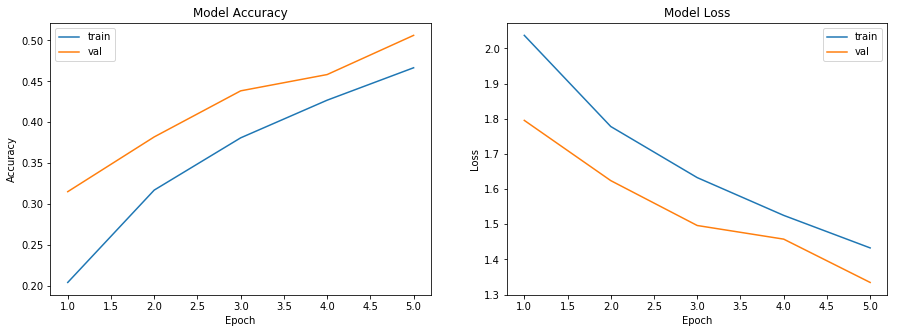

test_____________
10000/10000 [==============================] - 1s 131us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train_label = y_train
y_test_label = y_test
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))

model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary ()


# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=0.0001)

#checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             #monitor='val_loss', # quantity to monitor
                             #verbose=0, # verbosity - 0 or 1
                             #save_best_only= True, # The latest best model will not be overwritten
                             #mode='auto') 

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
                            optimizer=opt,
                            metrics=['accuracy'])

start = time.time()
from keras.utils import plot_model
plot_model(model, to_file='model.png')

print("train____________")
model_details = model.fit(x_train,y_train,epochs=500,batch_size=128,validation_data = (x_test, y_test))

end = time.time()
plot_model_history(model_details)
print("test_____________")
#loss_train,acc_train=model.evaluate(x_train,y_train)
loss,acc=model.evaluate(x_test,y_test)

(3, 3, 3, 32)
(32,)
(3, 3, 32, 32)
(32,)


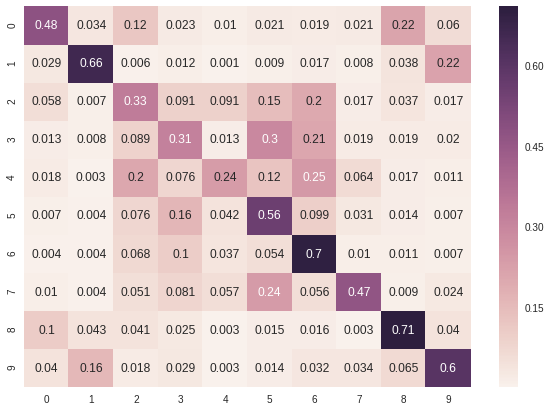

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = model.predict(x_train, verbose=2)
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = model.predict(x_test, verbose=2)
y_test_pred = np.argmax(y_test_pred, axis=1)

conf_matrix_train = confusion_matrix(y_train_label,y_train_pred)
conf_matrix_test = confusion_matrix(y_test_label,y_test_pred)


#y_pred = model.predict(x_test)

weights = model.get_weights()

print(weights [0].shape)  #第一层的w
print(weights [1].shape)  #第一层的b
print(weights [2].shape)  #第二层的w
print(weights [3].shape)  #第二层的b



import seaborn as sn
import pandas as pd
conf_matrix_test = conf_matrix_test/1000
df_cm_test = pd.DataFrame(conf_matrix_test, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_test, annot=True)

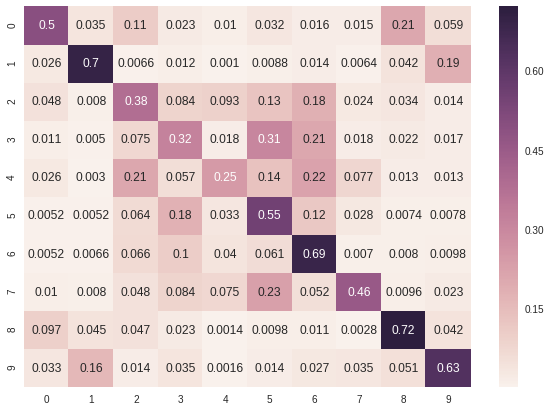

In [7]:
conf_matrix_train = conf_matrix_train/5000
df_cm_train = pd.DataFrame(conf_matrix_train, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_train, annot=True)